1979


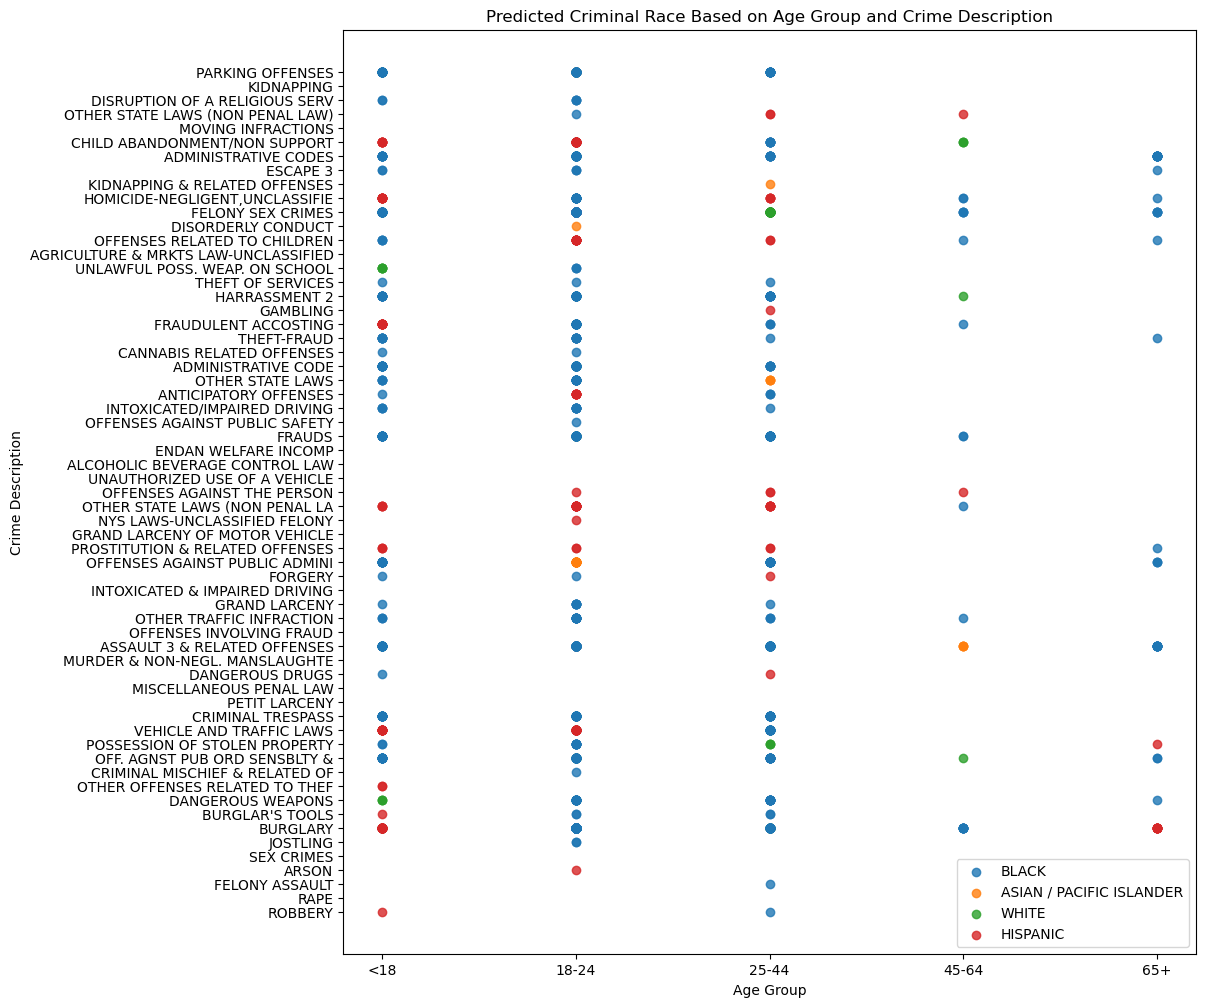

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


def sklearn_KNN(X_train,X_test,Y_train,k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    return predictions




#Read data
data = pd.read_csv('cleaneddata.csv')
unknownRace = data.loc[data['PERP_RACE'] == 'UNKNOWN'].dropna()
knownRace = data.loc[data['PERP_RACE'] != 'UNKNOWN'].dropna()
X_test = unknownRace[['AGE_GROUP','OFNS_DESC']].to_numpy()
X_train = knownRace[['AGE_GROUP','OFNS_DESC']].to_numpy()
Y_train = knownRace['PERP_RACE'].to_numpy()
k = 5
print(len(X_test))

# Label encoding for Age Group and Crime Description
age_group_encoder = LabelEncoder()
ofns_desc_encoder = LabelEncoder()
#Encodes labels of column 0 and 1 (age group and crime description)
X_train[:, 0] = age_group_encoder.fit_transform(X_train[:, 0])
X_test[:, 0] = age_group_encoder.transform(X_test[:, 0])
X_train[:, 1] = ofns_desc_encoder.fit_transform(X_train[:, 1])
X_test[:, 1] = ofns_desc_encoder.transform(X_test[:, 1])

# Predict criminal race using KNN
predictions = sklearn_KNN(X_train, X_test, Y_train, k)

#Declare plot size and dictionary for x and y axis
plt.figure(figsize=(11, 12))
crime_desc_labels = {}
for desc in enumerate(knownRace['OFNS_DESC'].unique()):
    crime_desc_labels[desc[0]] = desc[1]
age_group_labels = {
    0: '<18',
    1: '18-24',
    2: '25-44',
    3: '45-64',
    4: '65+'
}
#Create scatter plot with different colors for each race
for label in set(predictions):
    mask = predictions == label
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=label, alpha=0.8)

# Get labels for x and y
plt.xticks(range(5), [age_group_labels[i] for i in range(5)])
plt.yticks(range(len(crime_desc_labels)), [crime_desc_labels[i] for i in range(len(crime_desc_labels))])
# Add labels and legend
plt.xlabel('Age Group')
plt.ylabel('Crime Description')
plt.title('Predicted Criminal Race Based on Age Group and Crime Description')
plt.legend(loc='best')

# Show the plot
plt.show()


